In [96]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (8.0, 10.0)

In [97]:
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [140]:
class DataGenerator(object):
    def __init__(self, annFile, dataDir):
        self._annFile = annFile
        self._dataDir = dataDir
        self._coco = COCO(annFile)
        
    def getBatch(self, n=100, imgIds=None, expandMasks=False):
        if imgIds is None:
            ids = self._coco.getImgIds()
            imgIds = ids[:n]
        
        imgs = self._coco.loadImgs(ids=imgIds)

        images = []
        labels = []
        for img in imgs:
            I = io.imread('{}/{}'.format(dataDir, img['file_name']))
            images.append(np.moveaxis(I, -1, 0))
            annIds = self._coco.getAnnIds(imgIds=img['id'])
            anns = self._coco.loadAnns(annIds)
            if expandMasks:
                res = np.zeros((max(self._coco.getCatIds()) + 1,
                                I.shape[0], I.shape[1]))
                for ann in anns:
                    mask = self._coco.annToMask(ann)
                    res[ann['category_id']] = np.where(
                        mask != 0,
                        mask,
                        res[ann['category_id']])

                labels.append(res)
            else:
                res = np.zeros((I.shape[0], I.shape[1]), dtype=np.int32)
                for ann in anns:
                    mask = self._coco.annToMask(ann) * ann['category_id']
                    res = np.where(
                        mask != 0,
                        mask,
                        res[ann['category_id']]
                    )
                labels.append(res)

        return images, labels
        

In [141]:
annFile = 'annotations/instances_train2017.json'
dataDir = 'train2017'

In [204]:
gen = DataGenerator(annFile, dataDir)

loading annotations into memory...
Done (t=18.36s)
creating index...
index created!


In [205]:
images, labels = gen.getBatch(300, expandMasks=True)
labels[0].shape

(91, 427, 640)

In [206]:
i = 0

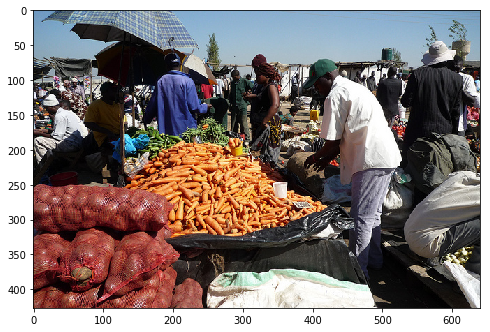

In [207]:
plt.imshow(np.moveaxis(images[i], 0, -1))
i += 1

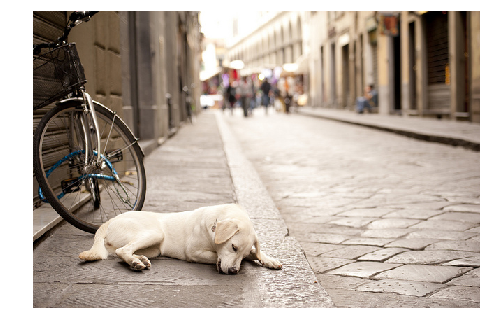

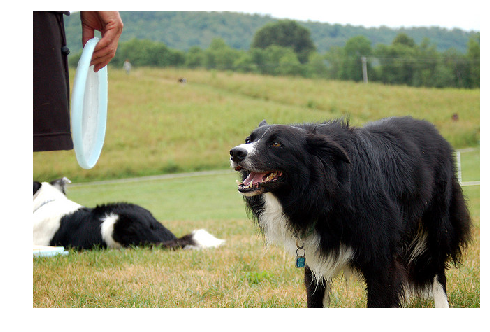

In [208]:
content = images[43]
style = images[2]
#content = images[48]
#style = images[16]
#content = images[254]
#style = images[210]
plt.figure(1)
plt.axis('off')
plt.imshow(np.moveaxis(content, 0, -1))

plt.figure(2)
plt.axis('off')

plt.imshow(np.moveaxis(style, 0, -1))
plt.show()

content_masks = labels[43]
style_masks = labels[2]
#content_masks = labels[48]
#style_masks = labels[16]
#content_masks = labels[254]
#style_masks = labels[210]

del labels
del images
del gen

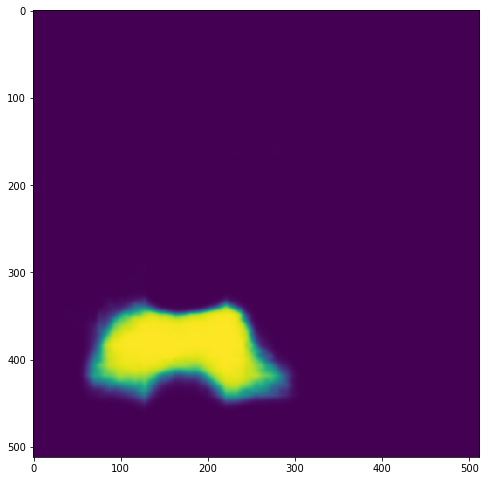

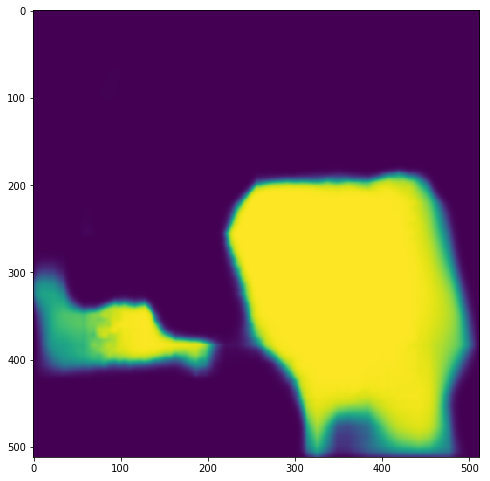

In [209]:
plt.figure(1)
plt.imshow(content_masks[12])
plt.show()

plt.figure(2)
plt.imshow(style_masks[12])
plt.show()